## Assignment 05

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [4]:
df = pd.read_csv("telecom_churn.csv")

## Task 1

In [5]:
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,MonthlyCharges,TotalCharges,Churn,Timestamp
0,CUST000001,Male,0.0,Yes,Yes,26.0,Yes,Fiber optic,70.32,NaN,No,2021-10-26
1,CUST000002,Female,0.0,No,No,NaN,Yes,Fiber optic,47.88,2161.36,Yes,2022-04-03
2,CUST000003,Male,0.0,No,Yes,NaN,Yes,NaN,99.91,4224.95,Yes,2021-05-03
3,CUST000004,Male,NaN,No,No,44.0,Yes,DSL,29.44,1340.09,No,2021-08-18
4,CUST000005,NaN,0.0,No,Yes,29.0,NaN,Fiber optic,78.82,2280.05,No,2022-02-17


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerID       100000 non-null  object 
 1   Gender           81787 non-null   object 
 2   SeniorCitizen    81861 non-null   float64
 3   Partner          81994 non-null   object 
 4   Dependents       82003 non-null   object 
 5   Tenure           82001 non-null   float64
 6   PhoneService     82096 non-null   object 
 7   InternetService  81579 non-null   object 
 8   MonthlyCharges   81904 non-null   float64
 9   TotalCharges     80257 non-null   object 
 10  Churn            100000 non-null  object 
 11  Timestamp        81757 non-null   object 
dtypes: float64(3), object(9)
memory usage: 9.2+ MB


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].replace(' ', pd.NA, inplace=True)
print(df['TotalCharges'])

0            NaN
1        2161.36
2        4224.95
3        1340.09
4        2280.05
          ...   
99995        NaN
99996    3534.35
99997    4739.00
99998     526.29
99999    4320.35
Name: TotalCharges, Length: 100000, dtype: float64


C:\Users\gandh\AppData\Local\Temp\ipykernel_20792\2062529000.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].replace(' ', pd.NA, inplace=True)


In [8]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Values (Count):")
print(missing_values)
print("\nMissing Values (Percentage):")
print(missing_percentage)

Missing Values (Count):
CustomerID             0
Gender             18213
SeniorCitizen      18139
Partner            18006
Dependents         17997
Tenure             17999
PhoneService       17904
InternetService    18421
MonthlyCharges     18096
TotalCharges       20591
Churn                  0
Timestamp          18243
dtype: int64

Missing Values (Percentage):
CustomerID          0.000
Gender             18.213
SeniorCitizen      18.139
Partner            18.006
Dependents         17.997
Tenure             17.999
PhoneService       17.904
InternetService    18.421
MonthlyCharges     18.096
TotalCharges       20.591
Churn               0.000
Timestamp          18.243
dtype: float64


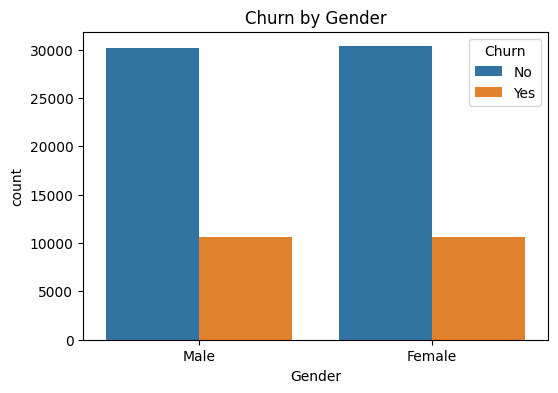

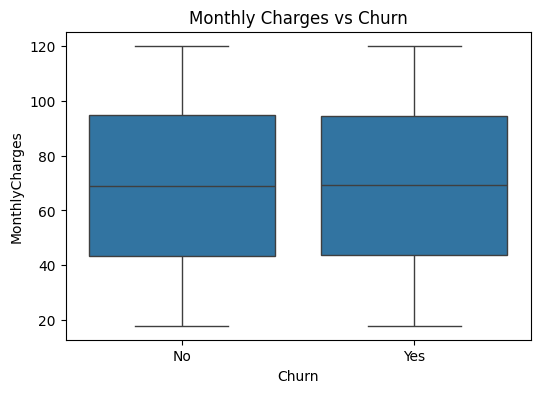

In [9]:
# 1. Churn by Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", hue="Churn", data=df)
plt.title("Churn by Gender")
plt.show()

# 2. MonthlyCharges vs Churn
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.show()




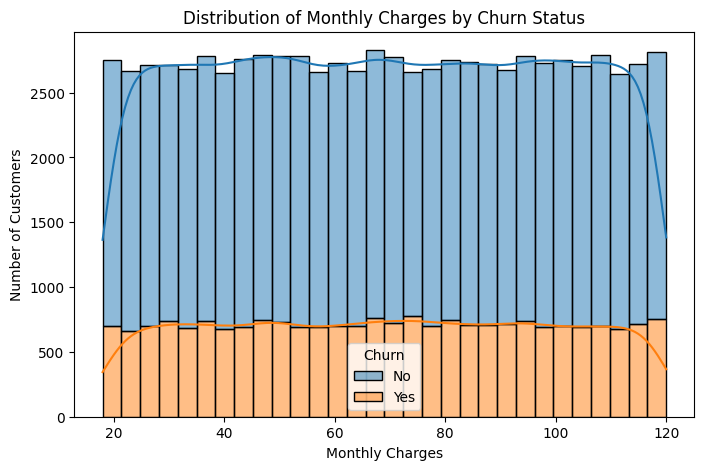

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=30, kde=True, multiple="stack")
plt.title("Distribution of Monthly Charges by Churn Status")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()

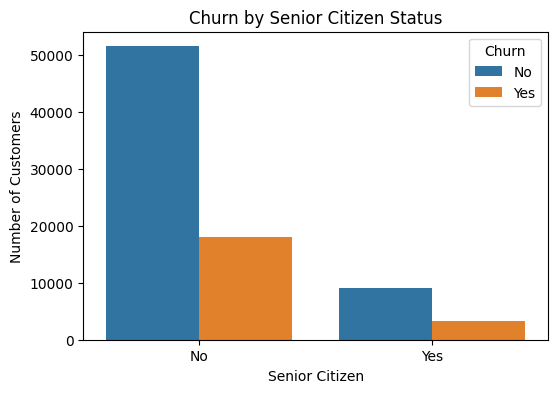

In [11]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: "No", 1: "Yes"})

plt.figure(figsize=(6,4))
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)
plt.title("Churn by Senior Citizen Status")
plt.xlabel("Senior Citizen")
plt.ylabel("Number of Customers")
plt.show()

**Numerical Features**
   - **MonthlyCharges**: Customers with **higher monthly charges** are more likely to churn.   
   - **TotalCharges** follows a similar trend as tenure since it accumulates over time.

**Categorical Features**
   - **Senior Citizens**: Churn rates are **higher among senior citizens** compared to non-seniors.
   - **Gender**: Churn distribution is fairly balanced across male and female customers, suggesting gender has little impact.

## Task 2 Feature Engineering


In [12]:
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['Tenure'].replace(0, 1))
df['HasDependentsOrPartner'] = ((df['Partner'] == "Yes") | (df['Dependents'] == "Yes")).astype(int)

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CustomerID              100000 non-null  object 
 1   Gender                  81787 non-null   object 
 2   SeniorCitizen           81861 non-null   object 
 3   Partner                 81994 non-null   object 
 4   Dependents              82003 non-null   object 
 5   Tenure                  82001 non-null   float64
 6   PhoneService            82096 non-null   object 
 7   InternetService         81579 non-null   object 
 8   MonthlyCharges          81904 non-null   float64
 9   TotalCharges            79409 non-null   float64
 10  Churn                   100000 non-null  object 
 11  Timestamp               81757 non-null   object 
 12  AvgMonthlySpend         65096 non-null   float64
 13  HasDependentsOrPartner  100000 non-null  int64  
dtypes: float64(4), int64(

## Task 3: Building the End-to-End Pipeline

In [22]:
numerical_features = [ 'Tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'HasDependentsOrPartner','SeniorCitizen']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#transform

In [23]:
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' 
)

In [24]:
X = df.drop(columns=["CustomerID", "Timestamp", "Churn"])
y = df["Churn"].map({"No":0,"Yes":1})

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Model Selection and Hyperparameter Tuning


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


Random Forest

In [28]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])
param_grid = {
    "classifier__n_estimators": [100, 200, 300],
    "classifier__max_depth": [5, 10, None],
    "classifier__min_samples_split": [2, 5, 10]
}
grid_search = GridSearchCV(
    rf_pipeline,
    param_grid,
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (f1_weighted):", grid_search.best_score_)

y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best Score (f1_weighted): 0.6397794589334205
              precision    recall  f1-score   support

           0       0.74      0.92      0.82     14791
           1       0.26      0.08      0.13      5209

    accuracy                           0.70     20000
   macro avg       0.50      0.50      0.47     20000
weighted avg       0.62      0.70      0.64     20000



Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear", random_state=42))
])

In [42]:
logreg_param_grid = {
    "classifier__penalty": ["l1", "l2"],
    "classifier__C": [0.01, 0.1, 1, 10]
}

In [43]:
logreg_grid_search = GridSearchCV(
    logreg_pipeline,
    logreg_param_grid,
    cv=5,
    scoring="recall",
    n_jobs=-1,
    verbose=2
)

In [44]:
logreg_grid_search.fit(X_train, y_train)
print("Best Parameters (LogReg):", logreg_grid_search.best_params_)
print("Best Recall (LogReg):", logreg_grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters (LogReg): {'classifier__C': 0.01, 'classifier__penalty': 'l1'}
Best Recall (LogReg): 0.0


In [45]:
y_pred = logreg_grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85     14791
           1       0.00      0.00      0.00      5209

    accuracy                           0.74     20000
   macro avg       0.37      0.50      0.43     20000
weighted avg       0.55      0.74      0.63     20000



c:\Users\gandh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gandh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gandh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

Gradiaent boost

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

In [34]:
gb_param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__learning_rate": [0.05, 0.1, 0.2],
    "classifier__max_depth": [3, 5]
}

In [35]:
gb_grid_search = GridSearchCV(
    gb_pipeline,
    gb_param_grid,
    cv=5,
    scoring="recall",
    n_jobs=-1,
    verbose=2
)

In [38]:
gb_grid_search.fit(X_train, y_train)
print("Best Parameters (GB):", gb_grid_search.best_params_)
print("Best Score (GB Recall):", gb_grid_search.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters (GB): {'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 200}
Best Score (GB Recall): 0.007919366450683946


In [39]:
y_pred = gb_grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.99      0.85     14791
           1       0.19      0.00      0.01      5209

    accuracy                           0.74     20000
   macro avg       0.47      0.50      0.43     20000
weighted avg       0.60      0.74      0.63     20000



All models are heavily biased toward the majority class No churn.
* Recall for churners (class 1) is the critical business metric → all three are failing poorly (RF = 0.04, GB = 0.01, LR = 0.00).
* The Churn dataset is imbalanced.

## Handling Class Imbalance


In [48]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [54]:
smote_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", RandomForestClassifier(
        random_state=42,
        max_depth=None,
        min_samples_split=2,
        n_estimators=100
    ))
])

In [55]:
smote_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [56]:
y_pred_smote = smote_pipeline.predict(X_test)

In [57]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73     14791
           1       0.26      0.29      0.27      5209

    accuracy                           0.60     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.61      0.60      0.61     20000



## important features

In [63]:
import numpy as np

In [58]:
ohe = smote_pipeline.named_steps["preprocessor"].named_transformers_["cat"].named_steps["onehot"]
categorical_features_out = ohe.get_feature_names_out(categorical_features)

In [65]:
all_features = np.concatenate([numerical_features, categorical_features_out])

In [66]:
importances = smote_pipeline.named_steps["classifier"].feature_importances_

feat_imp = pd.DataFrame({
    "Feature": all_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

In [67]:
import plotly.express as px
fig = px.bar(feat_imp.head(10), x="Importance", y="Feature")
fig.show()

## Important features
* Monthly charges
* Total Charges
* Tenure


# Final Verdict
* RF is highly biased towards churns detected which is a majority class
* SMOTE RF sacrifices some performance on “No churn” customers, but recall for churners improves 5x (0.04 → 0.20).
* This trade-off is exactly what we want in churn prediction: catching more churners is worth a drop in overall accuracy.